In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

## Data analysis

In [178]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# The train_images and test_images contain the image data.
# The train_labels and test_labels contain the corresponding labels.

In [179]:
# Assuming you have loaded CIFAR-10 as shown in the previous response
image_shape = train_images.shape
print(image_shape)  # Output would be (50000, 32, 32, 3)

first_image_shape = X_train[0].shape
print(first_image_shape)  # Output would be (32, 32, 3)


(50000, 32, 32, 3)
(32, 32, 3)


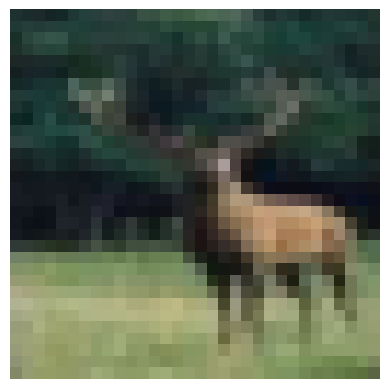

In [180]:
plt.imshow(train_images[343])
plt.axis('off')
plt.show()

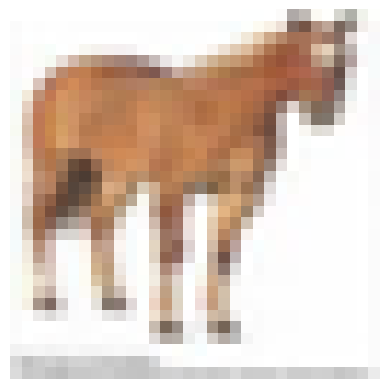

In [181]:
plt.imshow(train_images[1495])
plt.axis('off')
plt.show()

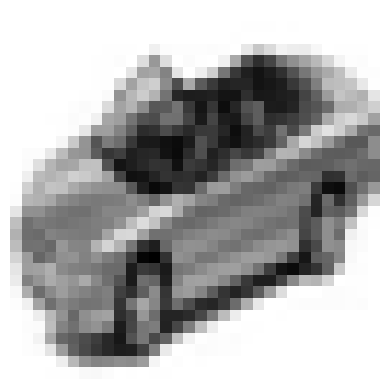

In [182]:
plt.imshow(train_images[9854])
plt.axis('off')
plt.show()

## Data preprocessing

In [183]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [184]:
size = train_images[0].shape
size

(32, 32, 3)

In [185]:
32*32*3

3072

In [186]:
train_images.max()


255

In [187]:
train_images.min()

0

Normalizing pixel values in image data is a common preprocessing step in machine learning, especially for deep learning models. By dividing the pixel values by 255, you are scaling the pixel values to the range [0, 1], which can help improve the training process and convergence of neural networks. This is because many machine learning algorithms, including neural networks, work more effectively when input features are on a similar scale.

In [188]:
train_images = train_images / 255
test_images = test_images / 255

In [189]:
train_images.shape

(50000, 32, 32, 3)

In [190]:
test_images.shape

(10000, 32, 32, 3)

The to_categorical function is commonly used in machine learning, particularly in the context of classification tasks, to convert integer labels into one-hot encoded vectors. One-hot encoding is a technique used to represent categorical data, such as class labels in classification problems, in a binary format that is suitable for machine learning algorithms.

In [191]:
train_labels.shape

(50000, 1)

In [192]:
train_labels[0]

array([6], dtype=uint8)

In [193]:
categorical_train_images = to_categorical(train_labels, 10)

In [194]:
categorical_train_images.shape

(50000, 10)

In [195]:
categorical_train_images[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [196]:
categorical_test_labels = to_categorical(test_labels, 10)

In [197]:
categorical_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Model creation

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [199]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [200]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 2, 2, 32)          16416     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 1, 1, 32)        

In [201]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', patience=3)

In [202]:
model.fit(train_images, categorical_train_images, epochs=15, validation_data=(test_images, categorical_test_labels), callbacks=[early])

Epoch 1/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6752 - accuracy: 0.3873 - val_loss: 1.6087 - val_accuracy: 0.4241
Epoch 2/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3184 - accuracy: 0.5259 - val_loss: 1.2284 - val_accuracy: 0.5642
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1748 - accuracy: 0.5830 - val_loss: 1.4142 - val_accuracy: 0.5308
Epoch 4/15
1563/1563 [==============================] - 27s 18ms/step - loss: 1.0777 - accuracy: 0.6197 - val_loss: 1.1472 - val_accuracy: 0.6117
Epoch 5/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0139 - accuracy: 0.6457 - val_loss: 1.0723 - val_accuracy: 0.6335
Epoch 6/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9617 - accuracy: 0.6628 - val_loss: 1.2045 - val_accuracy: 0.5945
Epoch 7/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9215 - accuracy: 0.6784 - val_loss: 1.0473 -

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.head()

<Axes: >

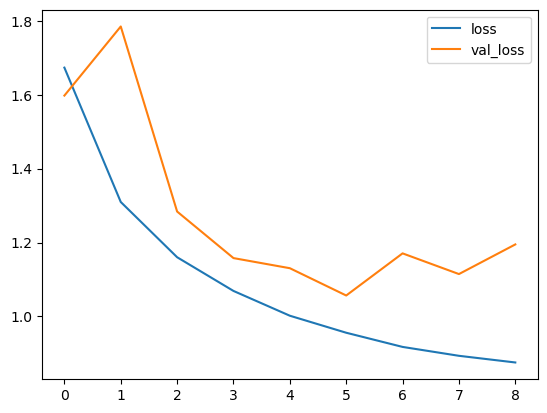

In [176]:
losses[['loss', 'val_loss']].plot()

<Axes: >

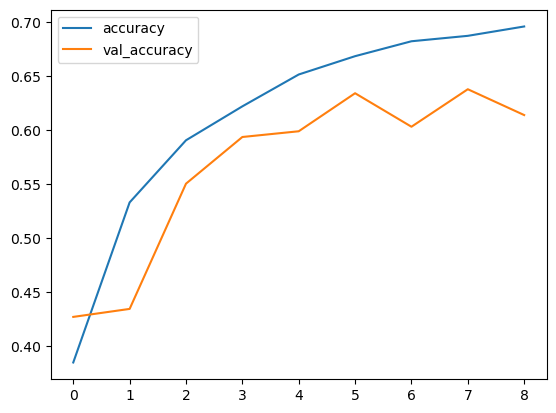

In [175]:
losses[['accuracy', 'val_accuracy']].plot()

In [205]:
evaluation = model.evaluate(test_images, categorical_test_labels, verbose=0)
evaluation

[1.1110609769821167, 0.6292999982833862]

In [207]:
from sklearn.metrics import classification_report, confusion_matrix
result = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [209]:
predicted_classes = result.argmax(axis=1)
predicted_classes

array([3, 8, 9, ..., 5, 3, 7])

In [210]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64      1000
           1       0.90      0.55      0.68      1000
           2       0.67      0.38      0.49      1000
           3       0.42      0.61      0.50      1000
           4       0.48      0.78      0.59      1000
           5       0.76      0.29      0.42      1000
           6       0.69      0.79      0.74      1000
           7       0.70      0.70      0.70      1000
           8       0.78      0.77      0.77      1000
           9       0.57      0.88      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.68      0.63      0.62     10000
weighted avg       0.68      0.63      0.62     10000



In [215]:
import seaborn as sns

<Axes: >

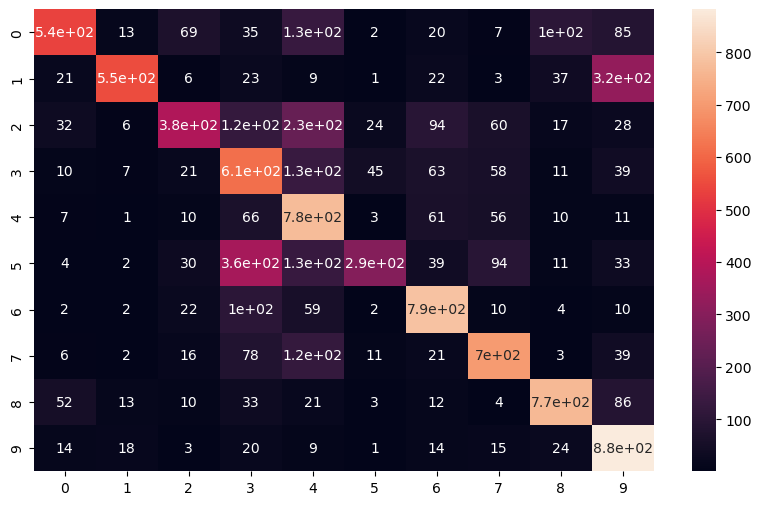

In [217]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_labels, predicted_classes), annot=True)

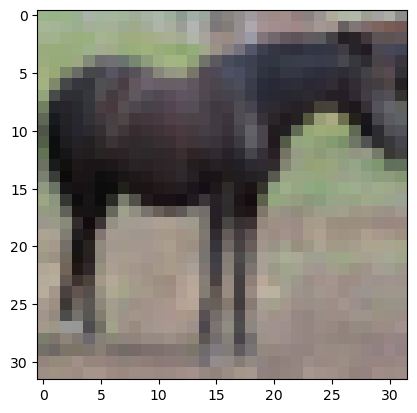

In [223]:
input_data = test_images[858]
plt.imshow(input_data)

In [228]:
predicted_val = model.predict(input_data.reshape(1,32,32,3))
predicted_class = predicted_val.argmax()
predicted_class

1/1 [==============================] - 0s 23ms/step


7

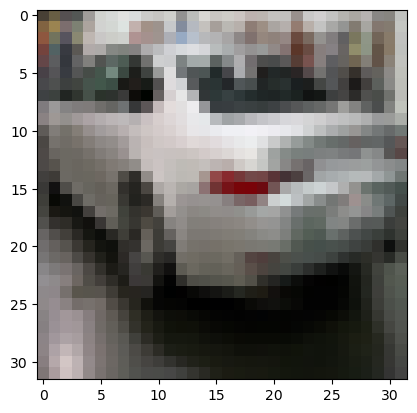

In [236]:
input_data = test_images[4594]
plt.imshow(input_data)

In [237]:
predicted_val = model.predict(input_data.reshape(1,32,32,3))
predicted_class = predicted_val.argmax()
predicted_class

1/1 [==============================] - 0s 20ms/step


1

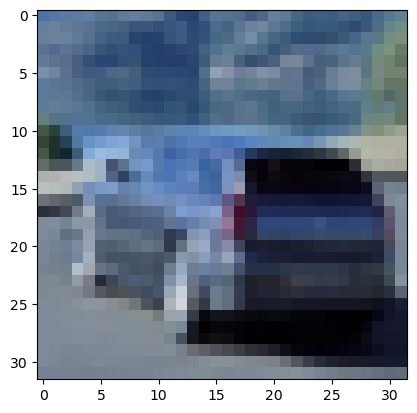

In [248]:
input_data = test_images[8674]
plt.imshow(input_data)

In [249]:
predicted_val = model.predict(input_data.reshape(1,32,32,3))
predicted_class = predicted_val.argmax()
predicted_class

1/1 [==============================] - 0s 24ms/step


9